# Making a bubble plot/dot plot for GO data
Anne has some GO enrichment terms that she wants to plot as a dotplot.
Can be done witht eh clusterProfiler package, but the whole enrichment analysis needs to be done with this. May be able to replicate this with ggplot2 "bubble plots" http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html#Bubble%20Plot

In [ ]:
load("GO_term_plot.RData")

In [1]:
library(ggplot2)

In [2]:
options(repr.plot.width=12, repr.plot.height=6)

## Read in preanalysed enriched GO terms

In [14]:
gores<-read.delim("/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/misc/GO_princetonIDs.txt")
gores

GOID,TERM,CORRECTED_PVALUE,UNCORRECTED_PVALUE,NUM_LIST_ANNOTATIONS,LIST_SIZE,TOTAL_NUM_ANNOTATIONS,POPULATION_SIZE,FDR_RATE,EXPECTED_FALSE_POSITIVES,ANNOTATED_GENES
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>
GO:0055002,striated muscle cell development,2.83e-11,8.34e-14,12,66,186,24619,0.00%,0,"cav3, tmod4, smyd1a, chrna1, tnnt3a, klhl40b, tcap, chrnd, tnnt2c, klhl41b, csrp3, myod1"
GO:0055001,muscle cell development,6.35e-11,1.87e-13,12,66,199,24619,0.00%,0,"cav3, tmod4, smyd1a, chrna1, tnnt3a, klhl40b, tcap, chrnd, tnnt2c, klhl41b, csrp3, myod1"
GO:0051146,striated muscle cell differentiation,2.09e-10,6.18e-13,12,66,220,24619,0.00%,0,"cav3, tmod4, smyd1a, chrna1, tnnt3a, klhl40b, tcap, chrnd, tnnt2c, klhl41b, csrp3, myod1"
GO:0042692,muscle cell differentiation,8.63e-10,2.55e-12,12,66,248,24619,0.00%,0,"cav3, tmod4, smyd1a, chrna1, tnnt3a, klhl40b, tcap, chrnd, tnnt2c, klhl41b, csrp3, myod1"
GO:0030239,myofibril assembly,1.63e-09,4.82e-12,9,66,97,24619,0.00%,0,"cav3, tmod4, smyd1a, tnnt3a, tcap, chrnd, tnnt2c, klhl41b, csrp3"
GO:0010927,cellular component assembly involved in morphogenesis,2.83e-09,8.35e-12,9,66,103,24619,0.00%,0,"cav3, tmod4, smyd1a, tnnt3a, tcap, chrnd, tnnt2c, klhl41b, csrp3"
GO:0061061,muscle structure development,5.66e-09,1.67e-11,13,66,371,24619,0.00%,0,"rbm24b, cav3, tmod4, smyd1a, chrna1, tnnt3a, klhl40b, tcap, chrnd, tnnt2c, klhl41b, csrp3, myod1"
GO:0031032,actomyosin structure organization,1.01e-07,2.99e-10,9,66,153,24619,0.00%,0,"cav3, tmod4, smyd1a, tnnt3a, tcap, chrnd, tnnt2c, klhl41b, csrp3"
GO:0006936,muscle contraction,2.57e-07,7.57e-10,8,66,114,24619,0.00%,0,"tmod4, tpma, tnnt3a, cx39.9, tcap, tnnt2c, csrp3, tnni2b.1"


In [15]:
# reverse order of df
gores<-gores[order(-gores$CORRECTED_PVALUE),]
# make dataframe for ggplot
godf<-data.frame(term = factor(gores$TERM, levels=gores$TERM),
                 adjp = gores$CORRECTED_PVALUE,
                 count = gores$NUM_LIST_ANNOTATIONS
                )
godf

term,adjp,count
<fct>,<dbl>,<int>
striated muscle contraction,7.99e-06,6
sarcomere organization,6.50e-07,6
muscle system process,4.13e-07,8
muscle contraction,2.57e-07,8
actomyosin structure organization,1.01e-07,9
muscle structure development,5.66e-09,13
cellular component assembly involved in morphogenesis,2.83e-09,9
myofibril assembly,1.63e-09,9
muscle cell differentiation,8.63e-10,12


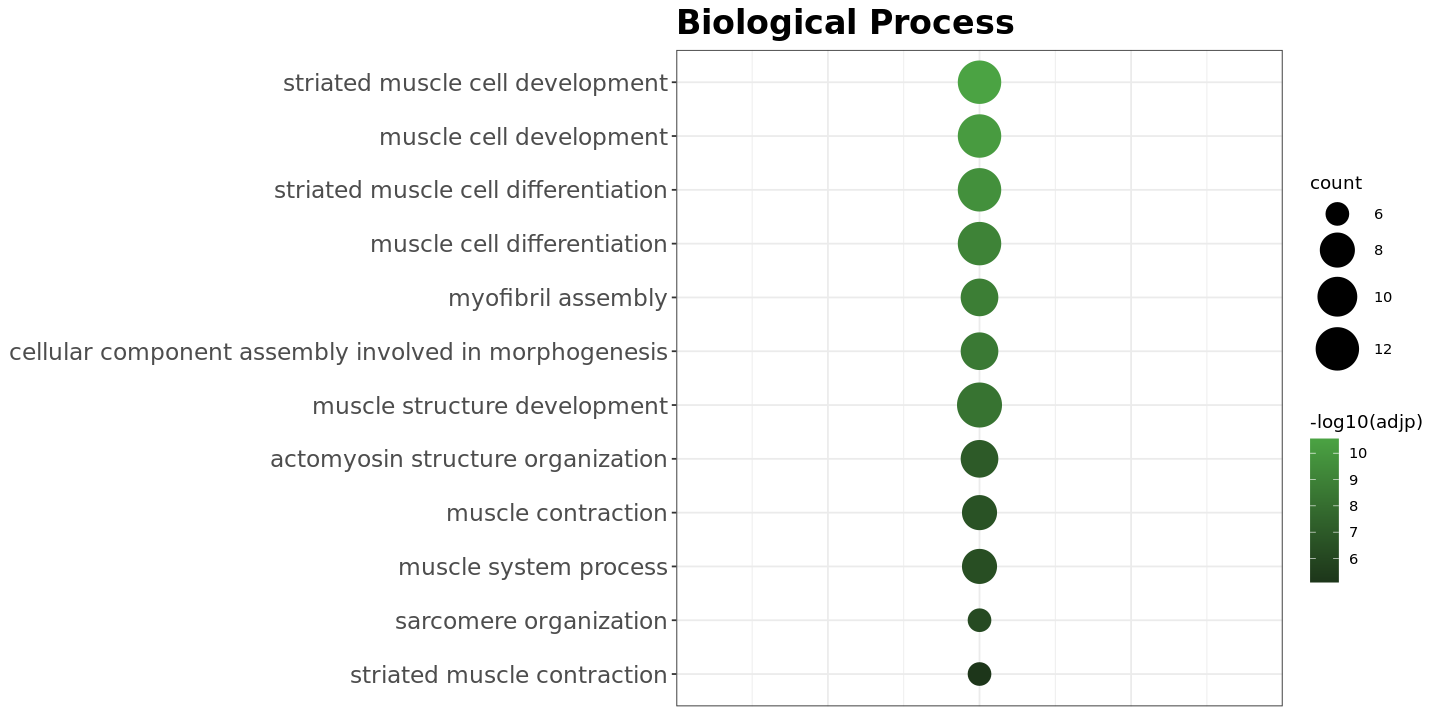

In [16]:
theme_set(theme_bw())
p <- ggplot(godf, aes(x=1, y=term)) + 
geom_jitter(width=0, height=0, aes(size=count, col = -log10(adjp))) + 
#scale_size_area(max_size = max(godf$count))+
scale_size(range = c(6,12))+
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
     axis.title.y=element_blank()) +
theme(axis.text = element_text(size = 14), plot.title = element_text(size = 20, face = "bold"))+
labs(title="Biological Process") +
scale_colour_gradient(high = "#4ba343",low = "#1d361a")
p
ggsave(p, file="GO_term_plot_outputs/GO_princetonIDs.pdf", width=10, height=6)

## 22/09/2020 Making a bubble plot/dot plot for updated GO data

### Read in preanalysed enriched GO terms

In [18]:
dotplot<-function(file, outfile, title){
   gores<-read.delim(file)
gores
# reverse order of df
gores<-gores[order(-gores$CORRECTED_PVALUE),]
# make dataframe for ggplot
godf<-data.frame(term = factor(gores$Gene.Ontology.term, levels=gores$Gene.Ontology.term),
                 adjp = gores$CORRECTED_PVALUE,
                 count = gores$NUM_LIST_ANNOTATIONS
                )
godf
theme_set(theme_bw())
p <- ggplot(godf, aes(x=1, y=term)) + 
geom_jitter(width=0, height=0, aes(size=count, col = -log10(adjp))) + 
#scale_size_area(max_size = max(godf$count))+
scale_size(range = c(6,12))+
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
     axis.title.y=element_blank()) +
theme(axis.text = element_text(size = 14), plot.title = element_text(size = 20, face = "bold"))+
labs(title=title) +
scale_colour_gradient(high = "#26E600",low = "#1d361a")
p
ggsave(p, file=outfile, width=10, height=6)
}
dotplot(file="/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/misc/GO_terms_Alison_200922_rnaseq_process.txt", 
        outfile="GO_term_plot_outputs/GO_terms_Alison_200922_rnaseq_process.pdf",
       title="Biological Process")

In [19]:
dotplot(file="/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/misc/GO_terms_Alison_200922_rnaseq_process.txt", 
        outfile="GO_term_plot_outputs/GO_terms_Alison_200922_rnaseq_process.pdf",
       title="Biological Process")
dotplot(file="/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/misc/GO_terms_Alison_200922_rnaseq_component.txt", 
        outfile="GO_term_plot_outputs/GO_terms_Alison_200922_rnaseq_component.pdf",
       title="Component")
dotplot(file="/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/misc/GO_terms_Alison_200922_celseq_process.txt", 
        outfile="GO_term_plot_outputs/GO_terms_Alison_200922_celseq_process.pdf",
       title="Biological Process")
dotplot(file="/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/misc/GO_terms_Alison_200922_celseq_component.txt", 
        outfile="GO_term_plot_outputs/GO_terms_Alison_200922_celseq_component.pdf",
       title="Component")

In [20]:
save.image(file = "GO_term_plot.RData")